# IPL Data Analysis Project

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize":(10,6)})



In [ ]:
df = pd.read_csv("matches.csv")
df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:

print("Total Matches Played:", df.shape[0])
print("Number of Seasons:", df['season'].nunique())
print("Teams Participated:", df['team1'].nunique())

df.info()


Total Matches Played: 756
Number of Seasons: 12
Teams Participated: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2  

Top Winning Teams:
 winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13088\4023290859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")


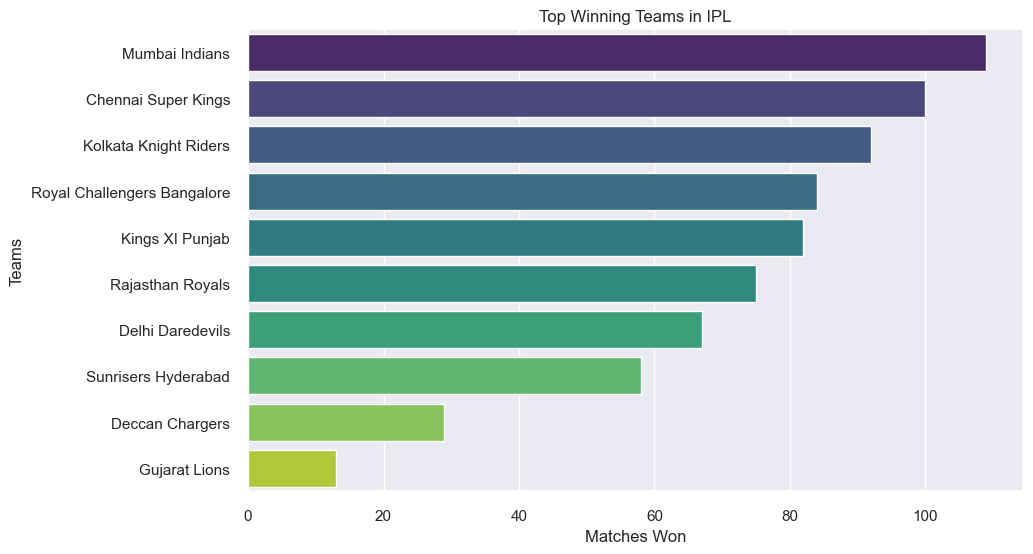

In [ ]:

team_wins = df['winner'].value_counts().head(10)

print("Top Winning Teams:\n", team_wins)

sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")
plt.title("Top Winning Teams in IPL")
plt.xlabel("Matches Won")
plt.ylabel("Teams")
plt.show()


Toss Decisions:
 toss_decision
field    463
bat      293
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13088\2058980177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_decision', data=df, palette="Set2")


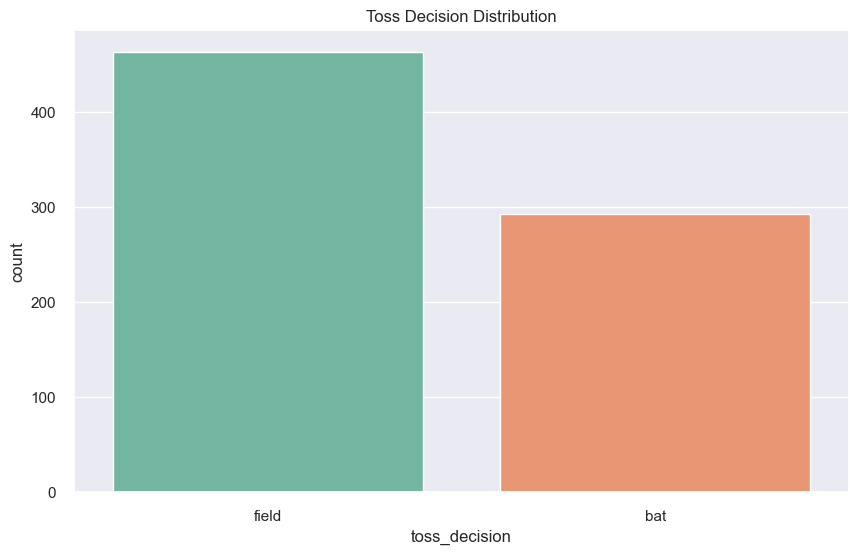

Percentage of Matches where Toss Winner also Won: 51.98%


In [ ]:

toss_decision = df['toss_decision'].value_counts()
print("Toss Decisions:\n", toss_decision)

sns.countplot(x='toss_decision', data=df, palette="Set2")
plt.title("Toss Decision Distribution")
plt.show()

# Probability toss winner = match winner
toss_match_win = (df['toss_winner'] == df['winner']).mean() * 100
print(f"Percentage of Matches where Toss Winner also Won: {toss_match_win:.2f}%")


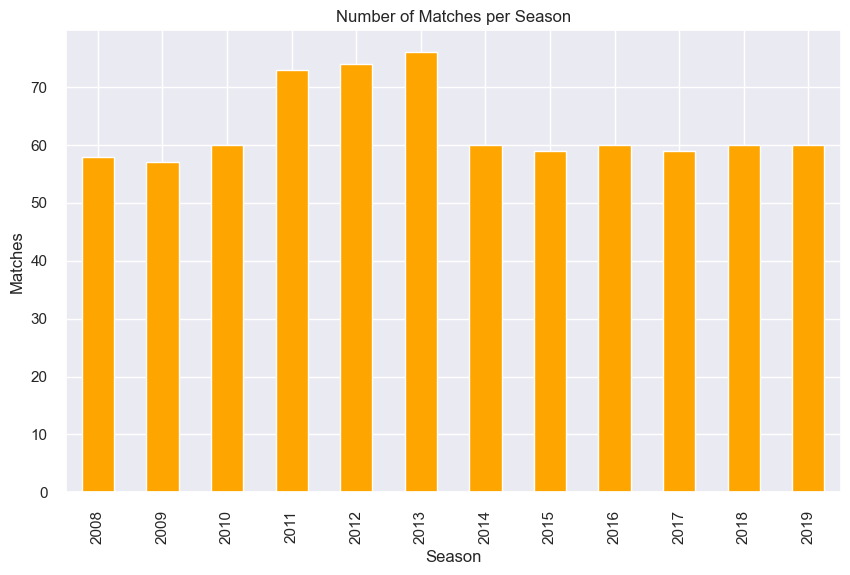

In [ ]:
season_matches = df['season'].value_counts().sort_index()

season_matches.plot(kind='bar', color="orange")
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13088\4269176124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=venue_wins.index, x=venue_wins.values, palette="coolwarm")


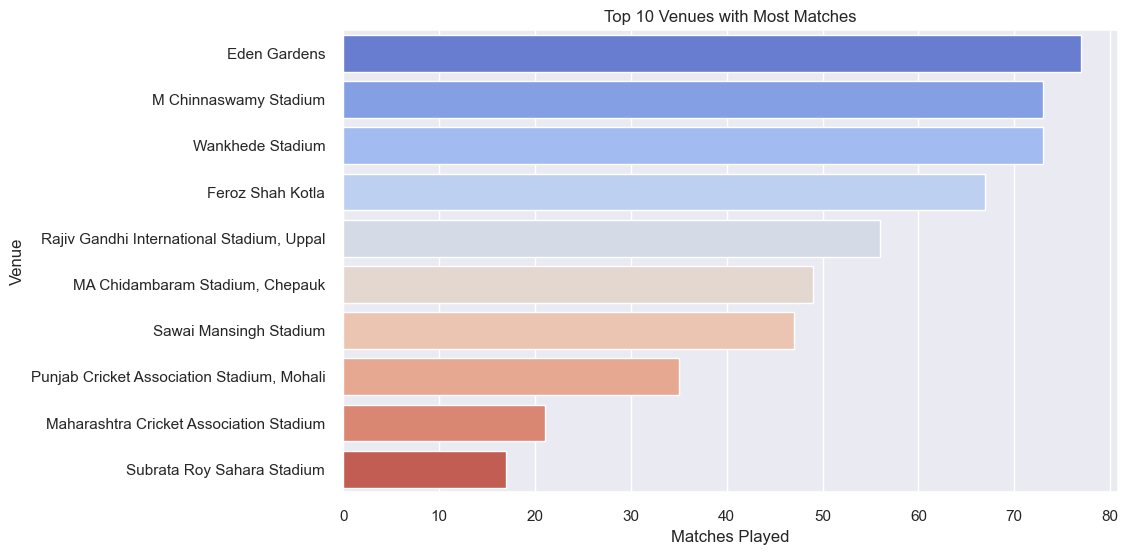

In [ ]:

venue_wins = df['venue'].value_counts().head(10)

sns.barplot(y=venue_wins.index, x=venue_wins.values, palette="coolwarm")
plt.title("Top 10 Venues with Most Matches")
plt.xlabel("Matches Played")
plt.ylabel("Venue")
plt.show()


In [ ]:
summary = {
    "Total Matches": [df.shape[0]],
    "Seasons": [df['season'].nunique()],
    "Teams": [df['team1'].nunique()],
    "Most Winning Team": [df['winner'].value_counts().idxmax()],
    "TossWin=MatchWin %": [round((df['toss_winner'] == df['winner']).mean() * 100, 2)]
}

summary_df = pd.DataFrame(summary)
summary_df.to_csv("IPL_Insights.csv", index=False)

summary_df


,Total Matches,Seasons,Teams,Most Winning Team,TossWin=MatchWin %
0,756,12,15,Mumbai Indians,51.98
